<a href="https://colab.research.google.com/github/vavana619/Dacon-Daily-Python-Camp/blob/main/Lv3_%EC%A0%84%EC%B2%98%EB%A6%AC_4_4_%EC%9B%90_%ED%95%AB_%EC%9D%B8%EC%BD%94%EB%94%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [↩️ 리스트로 돌아가기](https://dacon.io/competitions/open/235698/overview/description)

# 셀을 실행할 때 팝업이 뜨면 `무시하고 계속하기` 를 눌러주세요


# One-Hot Encoding
: 자신에게 맞는 것은 1로, 나머지는 0으로 바꾸어 줌

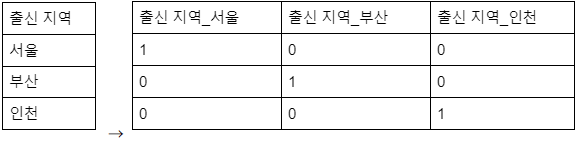

## 데이터 다운로드
---
아래 셀을 실행시켜 데이터를 colab 에 불러옵니다.
셀 실행은 Ctrl + Enter 를 이용해 실행시킬 수 있습니다.

In [ ]:
# 데이터 다운로드 링크로 데이터를 코랩에 불러옵니다.
!wget 'https://bit.ly/3i4n1QB'

import zipfile
with zipfile.ZipFile('3i4n1QB', 'r') as existing_zip:
    existing_zip.extractall('data')

--2022-05-19 10:06:33--  https://bit.ly/3i4n1QB
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://drive.google.com/uc?export=download&id=1emLrrpFWT8dCoj5BJb12-5QMG2-nruUw [following]
--2022-05-19 10:06:33--  https://drive.google.com/uc?export=download&id=1emLrrpFWT8dCoj5BJb12-5QMG2-nruUw
Resolving drive.google.com (drive.google.com)... 108.177.125.139, 108.177.125.100, 108.177.125.113, ...
Connecting to drive.google.com (drive.google.com)|108.177.125.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-10-10-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/p1f33ub8f2lhh40ojpbf3264fld0dro0/1652954775000/17946651057176172524/*/1emLrrpFWT8dCoj5BJb12-5QMG2-nruUw?e=download [following]
--2022-05-19 10:06:35--  https://doc-10-10-docs.googleusercontent.com/docs/securesc/ha0r

In [ ]:
# 라이브러리 불러오기
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# read_csv() 매서드로 train.csv 파일을 df class 로 불러오세요.
train = pd.read_csv('data/train.csv')

## 👋 실습
---

In [ ]:
# "OneHotEncoder"를 "encoder"라는 변수에 저장해보세요
encoder = OneHotEncoder()

In [ ]:
train[['type']]

,type
0,white
1,red
2,white
3,white
4,white
...,...
5492,white
5493,white
5494,white
5495,white


In [ ]:
# "encoder"를 사용해 train의 "type" 피쳐를 학습시켜보세요
encoder.fit(train[['type']])

OneHotEncoder()

In [ ]:
# "encoder"를 사용해 train의 "type"피쳐를 변환해 "onehot"이라는 변수에 저장해보세요
onehot = encoder.transform(train[['type']])

In [ ]:
# "onehot"이라는 변수를 array 형태로 변환해 보세요
onehot = onehot.toarray()

In [ ]:
# "onehot"이라는 변수를 DataFrame 형태로 변환해 보세요
onehot = pd.DataFrame(onehot)

In [ ]:
# encoder의 "get_feature_names()"를 사용해 column 이름을 바꿔보세요
onehot.columns = encoder.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# onehot을 원본데이터인 train에 병합시켜보세요
train = pd.concat([train, onehot], axis = 1)
train.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,x0_red,x0_white
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white,0.0,1.0
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red,1.0,0.0
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white,0.0,1.0
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white,0.0,1.0
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white,0.0,1.0


In [ ]:
# train의 "type" 변수를 제거해주세요
train = train.drop(columns = ['type'])
train.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,x0_red,x0_white
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,0.0,1.0
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,1.0,0.0
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,0.0,1.0
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,0.0,1.0
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,0.0,1.0


In [ ]:
# 위의 코드를 단순화하여 작성
train = pd.read_csv('data/train.csv')
encoder = OneHotEncoder()
onehot = pd.DataFrame(encoder.fit_transform(train[['type']]).toarray(), columns = encoder.get_feature_names())
train = pd.concat([train,onehot], axis = 1).drop(columns = ['type'])
train.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,x0_red,x0_white
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,0.0,1.0
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,1.0,0.0
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,0.0,1.0
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,0.0,1.0
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,0.0,1.0


## 정답
---

In [ ]:
# "OneHotEncoder"를 "encoder"라는 변수에 저장해보세요

encoder = OneHotEncoder()

In [ ]:
# "encoder"를 사용해 train의 "type" 피쳐를 학습시켜보세요

encoder.fit(train[['type']])

In [ ]:
# "encoder"를 사용해 train의 "type"피쳐를 변환해 "onehot"이라는 변수에 저장해보세요
onehot = encoder.transform(train[['type']])
onehot

In [ ]:
# "onehot"이라는 변수를 array 형태로 변환해 보세요

onehot = onehot.toarray()
onehot

In [ ]:
# "onehot"이라는 변수를 DataFrame 형태로 변환해 보세요

onehot = pd.DataFrame(onehot)
onehot.head()

In [ ]:
# encoder의 "get_feature_names()"를 사용해 column 이름을 바꿔보세요
onehot.columns = encoder.get_feature_names()
onehot.head()

In [ ]:
# onehot을 원본데이터인 train에 병합시켜보세요

onehot = pd.concat([train, onehot], axis = 1)
onehot.head()

In [ ]:
# train의 "type" 변수를 제거해주세요
train = train.drop(columns = ['type'])
train.head()

In [ ]:
### 코드를 더 단순화 시켜볼게요!
train = pd.read_csv('data/train.csv')
encoder = OneHotEncoder()
onehot = pd.DataFrame(encoder.fit_transform(train[['type']]).toarray(), columns = encoder.get_feature_names())
train = pd.concat([train,onehot], axis = 1).drop(columns = ['type'])
train.head()

# [↩️ 리스트로 돌아가기](https://dacon.io/competitions/open/235698/overview/description)